# Banking - Improving Long term Deposit

In [1]:
# Lets import our basic libraries for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install scikit-learn
!pip install imbalanced-learn
import sklearn
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

You should consider upgrading via the 'c:\users\juan_\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\juan_\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [2]:
# Now lets import datamodeling libraries that might help us.
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
data = pd.read_csv("new_train.csv")
print(data.shape)

(32950, 16)


In [4]:
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
5,29,admin.,single,university.degree,no,no,no,cellular,aug,wed,256,2,999,0,nonexistent,no
6,26,student,single,basic.9y,no,no,no,telephone,aug,wed,449,1,999,0,nonexistent,yes
7,30,blue-collar,married,basic.4y,no,yes,no,cellular,nov,wed,126,2,999,0,nonexistent,no
8,50,blue-collar,married,basic.4y,unknown,no,no,telephone,may,fri,574,1,999,0,nonexistent,no
9,33,admin.,single,high.school,no,yes,no,cellular,jul,tue,498,5,999,0,nonexistent,no


In [5]:
#Verificando los tipos de datos para ver si requieren transformación
data.dtypes
# Age (int) = Edad del sujeto a prueba
# Job (varchar) = Tipo de trabajo que la persona tiene
# Marital (varchar) = Tipo de estado civil
# Education (varchar) = Grado de escolaridad de la persona
# Default (varchar) = Tiene algún crédito dentro del banco?
# Housing (varchar) = Tiene algún crédito hipotecario?
# Loan (varchar) = Tiene algún crédito con el banco?
# Contact (varchar) = Como se le contacto a la persona
# Month (varchar) = En qué mes se le contacto a la persona
# day_of_week (varchar) = En qué día se le contacto a la persona
# Duration (int) = Duración del contacto en segundos (Sí Duration=0 entonces y=no)
# Campaign (int) = Número de contactos que se le hicieron a la persona
# Pdays (int) = Días que pasaron desde el último contacto (999 no se contacto con anterioridad)
# Previous (int) = Número de contactos al cliente previo a esta campaña
# Poutcome (varchar) = Resultado de la campaña anterior con este cliente
# Y (varchar) = Long term deposit, se enrola? Sí o no.

age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

In [6]:
data.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [7]:
data["y"].value_counts()

no     29238
yes     3712
Name: y, dtype: int64

In [8]:
data.corr()

,age,duration,campaign,pdays,previous
age,1.000000,-0.001841,0.003302,-0.032011,0.020670
duration,-0.001841,1.000000,-0.075663,-0.047127,0.022538
campaign,0.003302,-0.075663,1.000000,0.053795,-0.079051
pdays,-0.032011,-0.047127,0.053795,1.000000,-0.589601
previous,0.020670,0.022538,-0.079051,-0.589601,1.000000


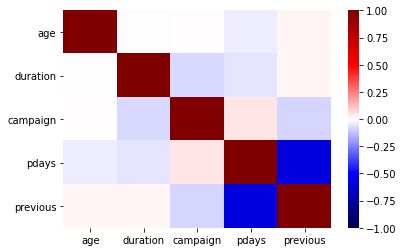

In [9]:
correlacion = sns.heatmap(data.corr(),vmin=-1,vmax=1,cmap='seismic')

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'duration'}>],
       [<AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>],
       [<AxesSubplot:title={'center':'previous'}>, <AxesSubplot:>]],
      dtype=object)

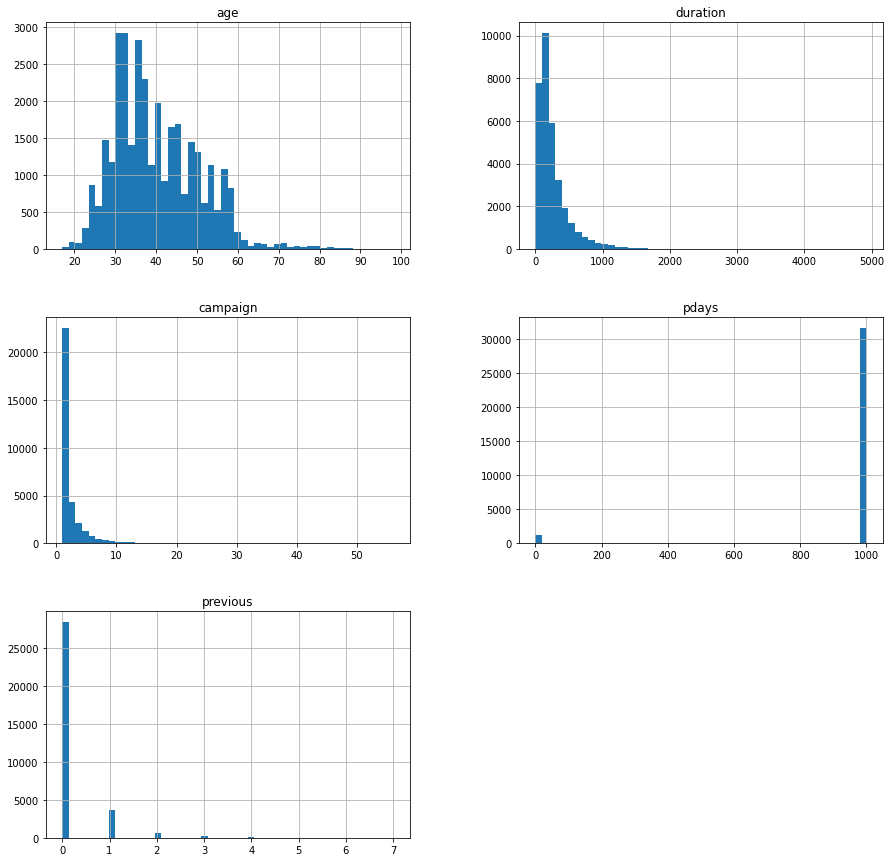

In [10]:
data.hist(figsize=(15,15),bins=50)

Text(0.5, 1.0, 'Long Term Deposit')

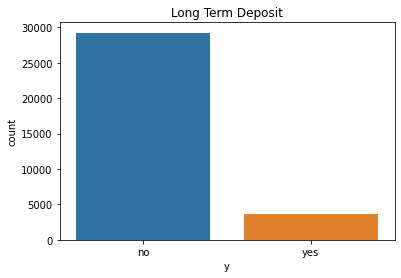

In [11]:
sns.countplot(data["y"])
plt.title("Long Term Deposit")

Text(0.5, 1.0, 'Marital Status')

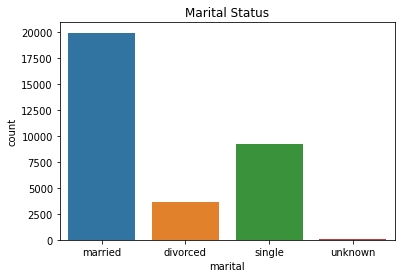

In [12]:
sns.countplot(data["marital"],x=data["marital"])
plt.title("Marital Status")

Text(0.5, 1.0, 'Education Degree')

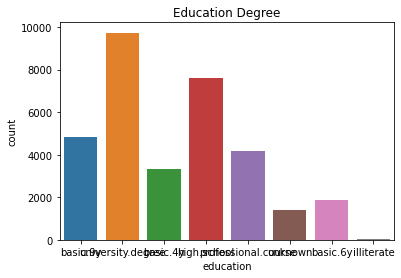

In [13]:
sns.countplot(data["education"],x=data["education"])
plt.title("Education Degree")

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


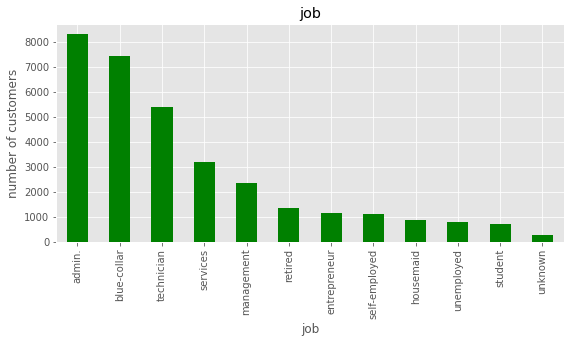

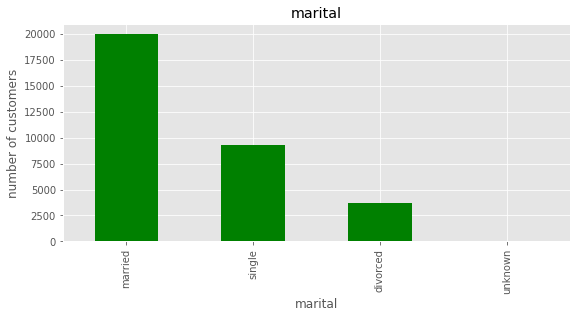

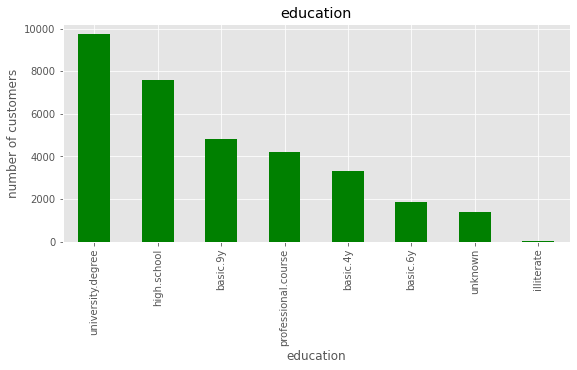

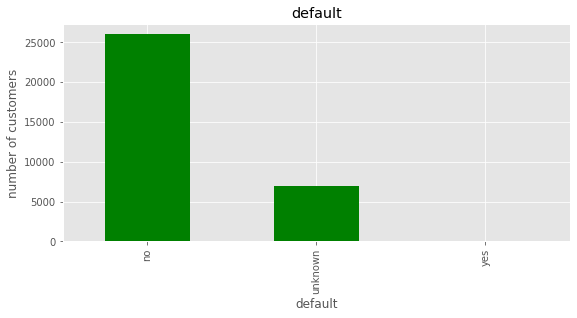

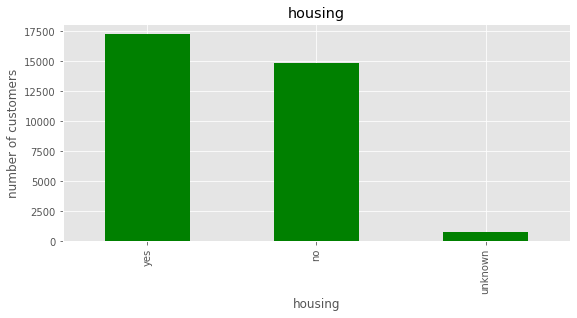

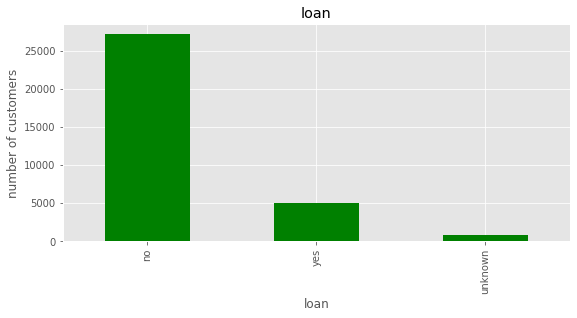

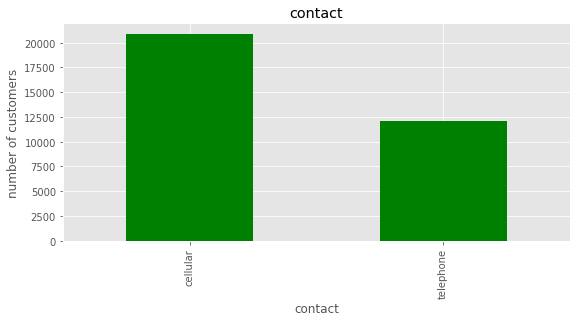

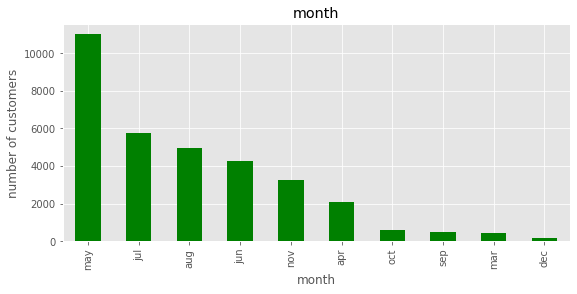

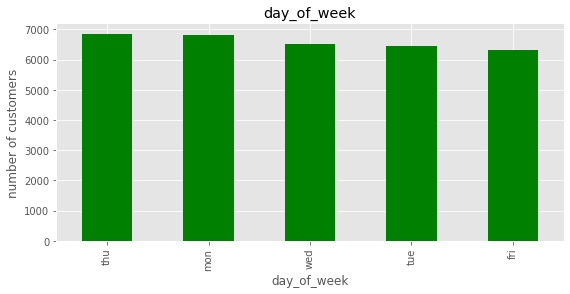

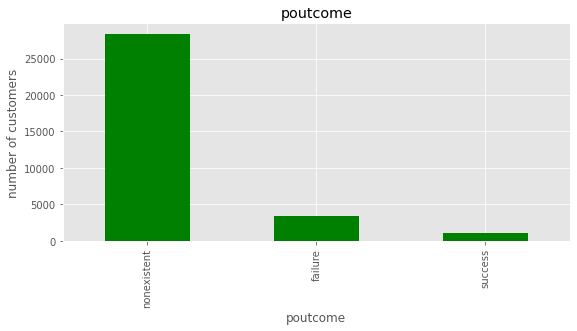

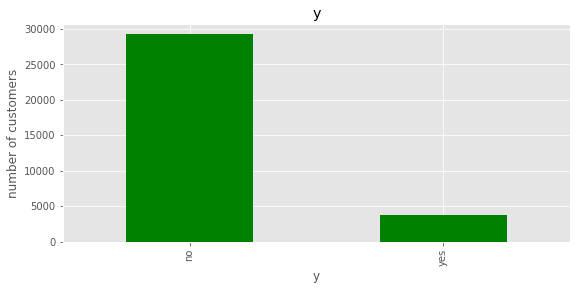

In [35]:
# Hagamos un plot de nuestras variables categóricas
objetos = data.select_dtypes(include= ["object"]).columns
print(objetos)

# Armamos el plot
plt.style.use("ggplot")

for column in objetos:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    data[column].value_counts().plot(kind="bar",color='g')
    plt.xlabel(column)
    plt.ylabel("number of customers")
    plt.title(column)

In [36]:
#Remplazamos todos aquellos datos que nos representan valores pérdidos y los arreglamos con la moda para mantener un balance,
#vemos que los valores de Unknow en las gráficas son pocos o casi inexistentes por lo cuál se nos facilita removerlos

In [39]:
data['loan'].unique()

array(['no', 'yes'], dtype=object)

In [37]:
for column in objetos:
    mode = data[column].mode()[0]
    data[column] = data[column].replace('unknown',mode)

In [38]:
data['loan'].unique()

array(['no', 'yes'], dtype=object)

In [40]:
nums = data.select_dtypes(include=np.number)
nums.head()

,age,duration,campaign,pdays,previous
0,49,227,4,999,0
1,37,202,2,999,1
2,78,1148,1,999,0
3,36,120,2,999,0
4,59,368,2,999,0


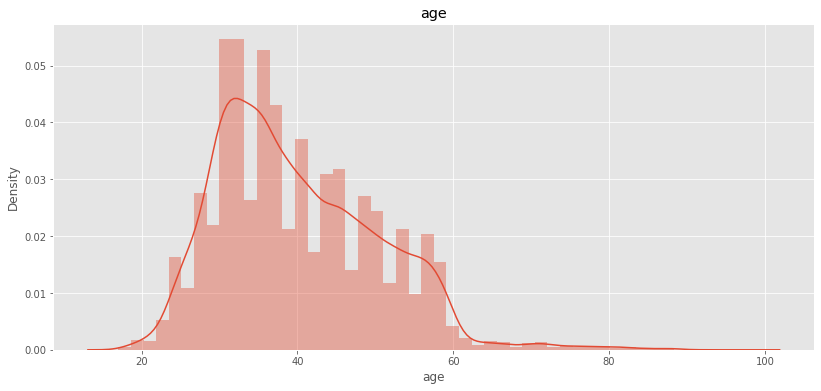

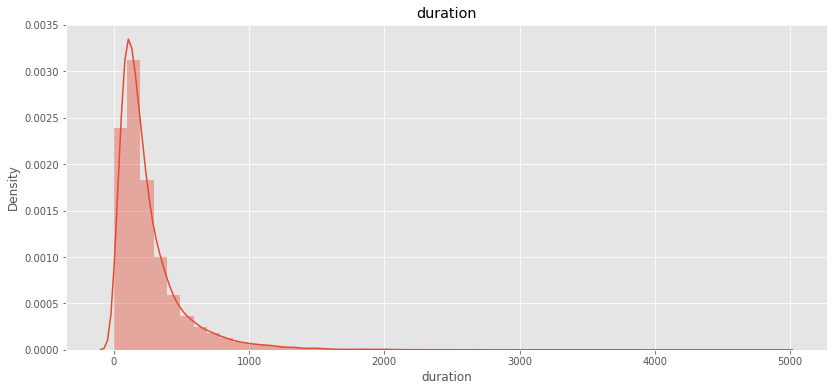

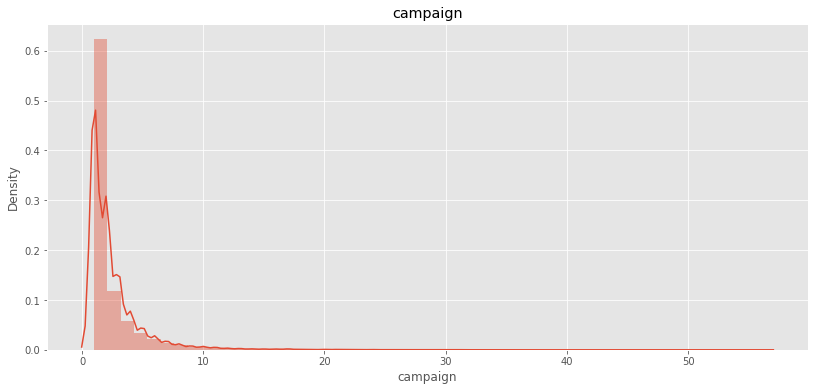

In [41]:
plt.style.use('ggplot')
for column in ['age','duration','campaign']:
    plt.figure(figsize=(30,6))
    plt.subplot(121)
    sns.distplot(data[column],kde=True)
    plt.title(column)

In [43]:
data.drop(columns=['pdays','previous'], axis=1,inplace=True)

In [44]:
data.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,49,blue-collar,married,basic.9y,no,no,no,cellular,nov,wed,227,4,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,failure,no


In [45]:
#Veamos las variables que más se relacionan hacia nuestra y sobre los diferentes X_Thetas que tenemos para ver si gráficamente,
#podemos encontrar alguna relación de mayor grado con los objetos

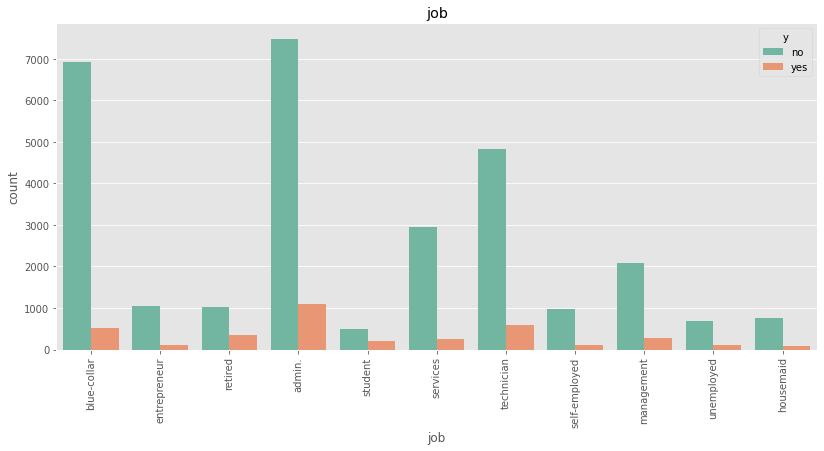

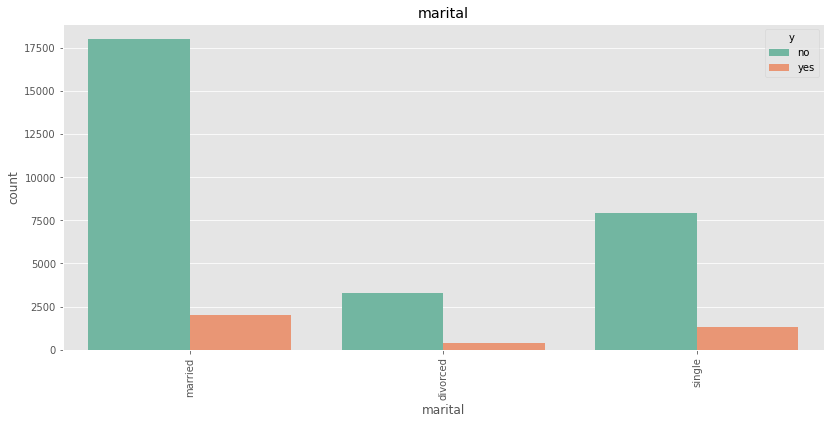

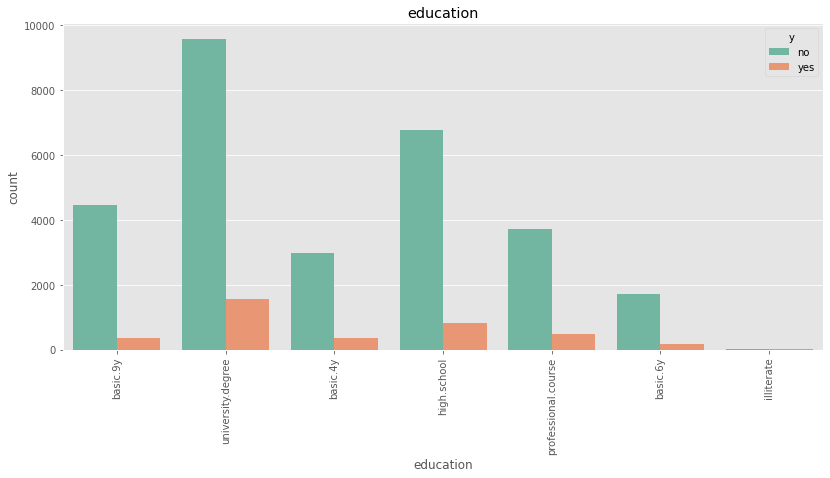

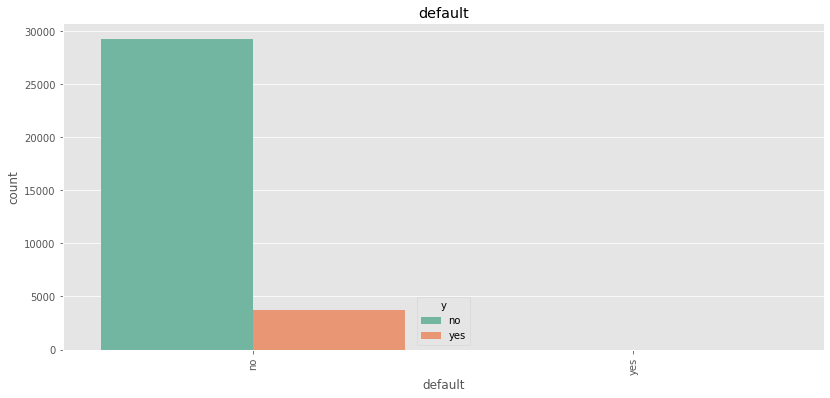

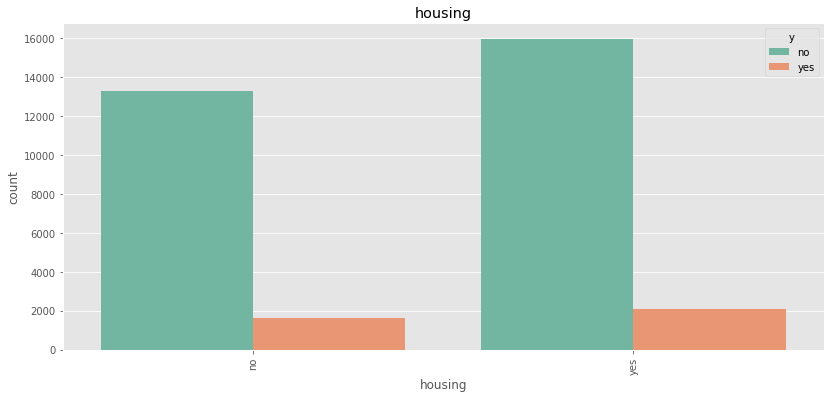

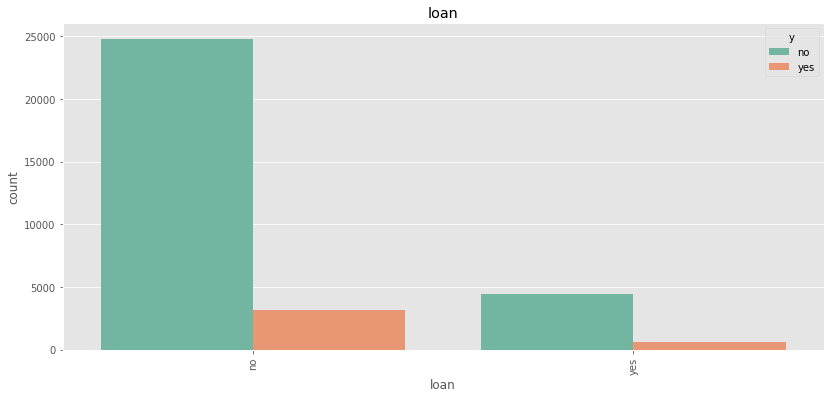

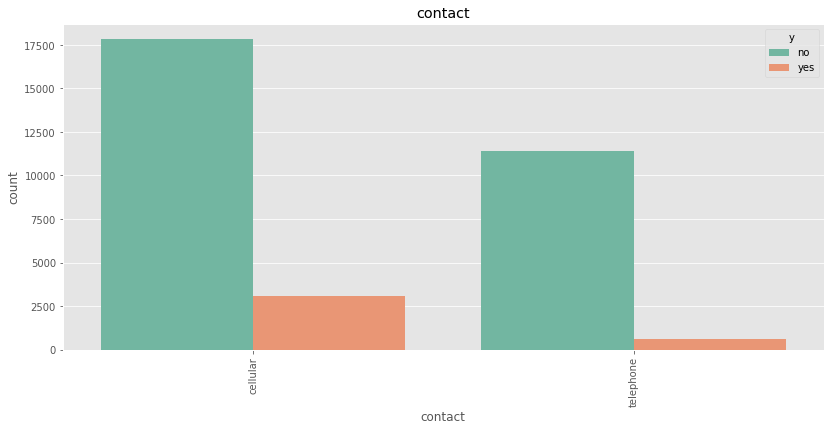

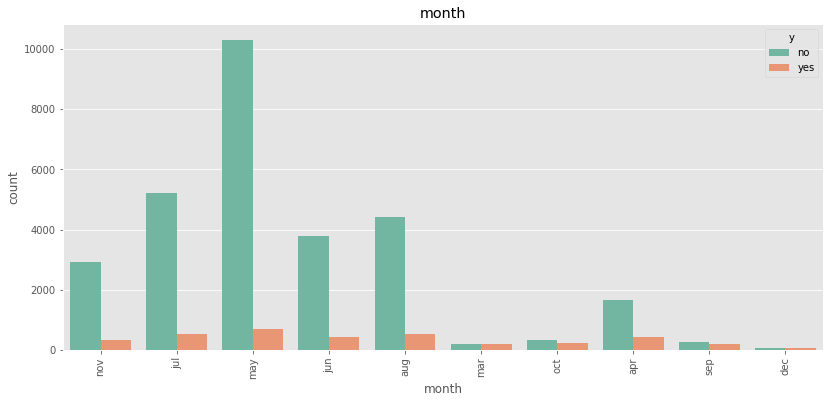

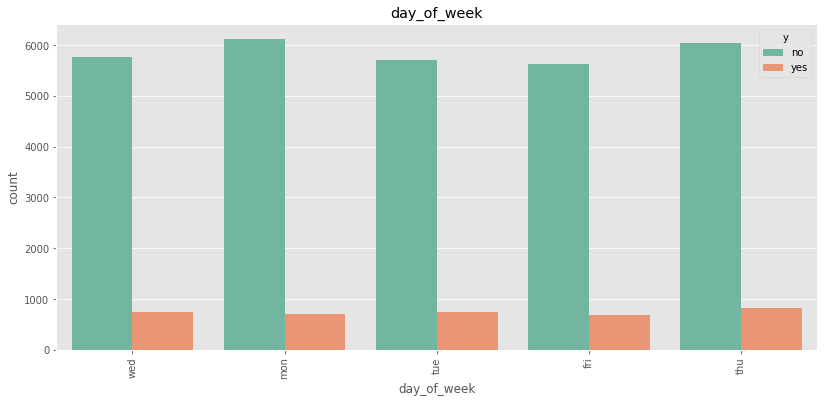

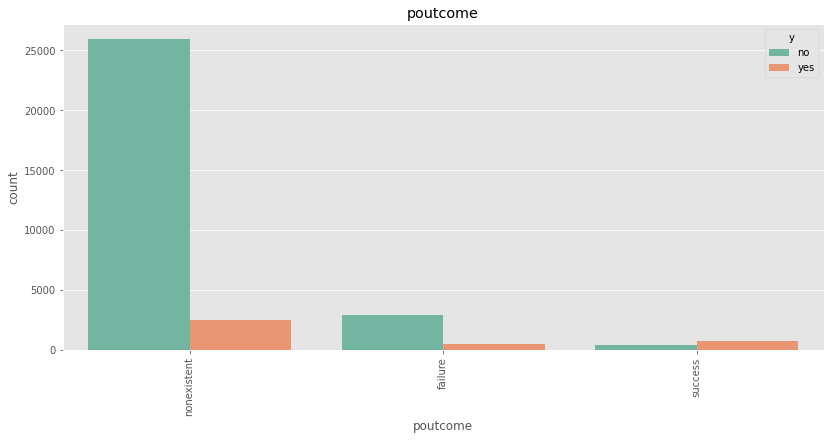

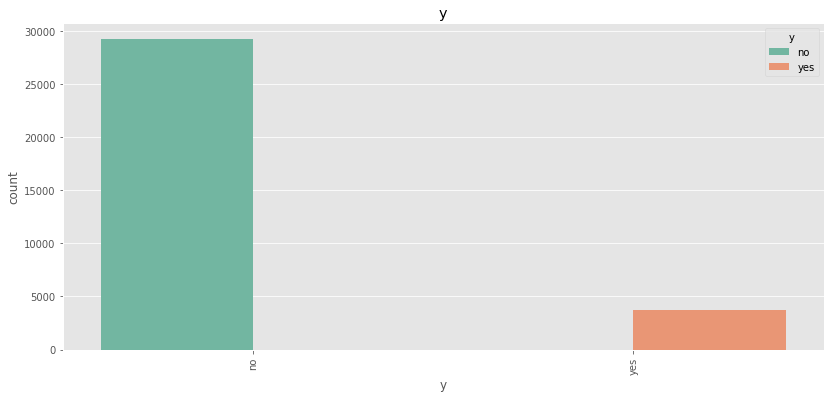

In [51]:
plt.style.use("ggplot")
for column in objetos:
    plt.figure(figsize=(30,6))
    plt.subplot(121)
    sns.countplot(data[column], hue=data["y"],palette='Set2')
    plt.title(column)    
    plt.xticks(rotation=90)

In [52]:
data.describe()

,age,duration,campaign
count,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607
std,10.403636,258.975917,2.752326
min,17.000000,0.000000,1.000000
25%,32.000000,103.000000,1.000000
50%,38.000000,180.000000,2.000000
75%,47.000000,319.000000,3.000000
max,98.000000,4918.000000,56.000000


# Normalizing data

In [53]:
#Para normalizar vamos a eliminar los outliers porque como pudimos ver nuestras variables numéricas tienen un Skew demasiado
#positivo por lo que tenemos demasiados datos atípicos a la derecha y no permite que la data sea normal

In [55]:
min_front = []
max_front = []
for i in ['age','duration','campaign']:
    IQR = data[i].quantile(0.75)-data[i].quantile(0.25)
    min_values = data[i].quantile(0.25) - (1.5*IQR)
    max_values = data[i].quantile(0.75) + (1.5*IQR)
    
    print(i, ":", min_values, ", ",max_values)
    min_front.append(min_values)
    max_front.append(max_values)

age : 9.5 ,  69.5
duration : -221.0 ,  643.0
campaign : -2.0 ,  6.0


In [56]:
min_front

[9.5, -221.0, -2.0]

In [57]:
max_front

[69.5, 643.0, 6.0]

In [58]:
k = 0
for i in ['age','duration','campaign']:
    data.loc[data[i]>max_front[k],i] = int(max_front[k])
    k += 1

In [59]:
data.describe()

,age,duration,campaign
count,32950.000000,32950.000000,32950.000000
mean,39.929894,234.923915,2.271077
std,10.118566,176.854558,1.546302
min,17.000000,0.000000,1.000000
25%,32.000000,103.000000,1.000000
50%,38.000000,180.000000,2.000000
75%,47.000000,319.000000,3.000000
max,69.000000,643.000000,6.000000


## Transformando variables categóricas

In [60]:
#Muchas de nuestras variables son categóricas pero para hacer un mejor análisis de correlación necesitamos hacer un label encoding
#Así también como one hot encoding cuando es posible o nos sirve la información

In [66]:
for i in objetos:
    print(i, ":", data[i].unique())
    print("")

job : ['blue-collar' 'entrepreneur' 'retired' 'admin.' 'student' 'services'
 'technician' 'self-employed' 'management' 'unemployed' 'housemaid']

marital : ['married' 'divorced' 'single']

education : ['basic.9y' 'university.degree' 'basic.4y' 'high.school'
 'professional.course' 'basic.6y' 'illiterate']

default : ['no' 'yes']

housing : ['no' 'yes']

loan : ['no' 'yes']

contact : ['cellular' 'telephone']

month : ['nov' 'jul' 'may' 'jun' 'aug' 'mar' 'oct' 'apr' 'sep' 'dec']

day_of_week : ['wed' 'mon' 'tue' 'fri' 'thu']

poutcome : ['nonexistent' 'failure' 'success']

y : ['no' 'yes']



In [68]:
label = LabelEncoder()

for feature in objetos:
    data[feature] = label.fit_transform(data[feature])

In [69]:
data.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,49,1,1,2,0,0,0,0,7,4,227,4,1,0
1,37,2,1,6,0,0,0,1,7,4,202,2,0,0
2,69,5,1,0,0,0,0,0,3,1,643,1,1,1


In [71]:
#volvimos todas nuestras variables a númericas utilizando el label encoding

In [70]:
data.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,39.929894,3.634901,1.169408,3.706434,0.000091,0.547800,0.152443,0.365463,4.233414,2.000546,234.923915,2.271077,0.929469,0.112656
std,10.118566,3.548829,0.603146,2.081246,0.009542,0.497717,0.359455,0.481567,2.319693,1.400260,176.854558,1.546302,0.364187,0.316176
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,103.000000,1.000000,1.000000,0.000000
50%,38.000000,2.000000,1.000000,3.000000,0.000000,1.000000,0.000000,0.000000,4.000000,2.000000,180.000000,2.000000,1.000000,0.000000
75%,47.000000,7.000000,2.000000,6.000000,0.000000,1.000000,0.000000,1.000000,6.000000,3.000000,319.000000,3.000000,1.000000,0.000000
max,69.000000,10.000000,2.000000,6.000000,1.000000,1.000000,1.000000,1.000000,9.000000,4.000000,643.000000,6.000000,2.000000,1.000000


In [72]:
#Separamos todas nuestras features dimensionales o X_thetas
x = data.iloc[:,:-1]
#Separamos nuestro output en el que estamos interesados "Y"
y = data.iloc[:,-1]

In [73]:
x

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome
0,49,1,1,2,0,0,0,0,7,4,227,4,1
1,37,2,1,6,0,0,0,1,7,4,202,2,0
2,69,5,1,0,0,0,0,0,3,1,643,1,1
3,36,0,1,6,0,1,0,1,6,1,120,2,1
4,59,5,0,6,0,0,0,0,4,3,368,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,7,2,3,0,1,0,0,3,3,192,1,1
32946,52,9,1,5,0,1,0,0,7,0,64,1,0
32947,54,0,1,2,0,0,1,0,3,1,131,4,1
32948,29,0,1,6,0,0,0,1,6,0,165,1,1


In [74]:
y

0        0
1        0
2        1
3        0
4        0
        ..
32945    0
32946    0
32947    0
32948    0
32949    0
Name: y, Length: 32950, dtype: int32

<AxesSubplot:>

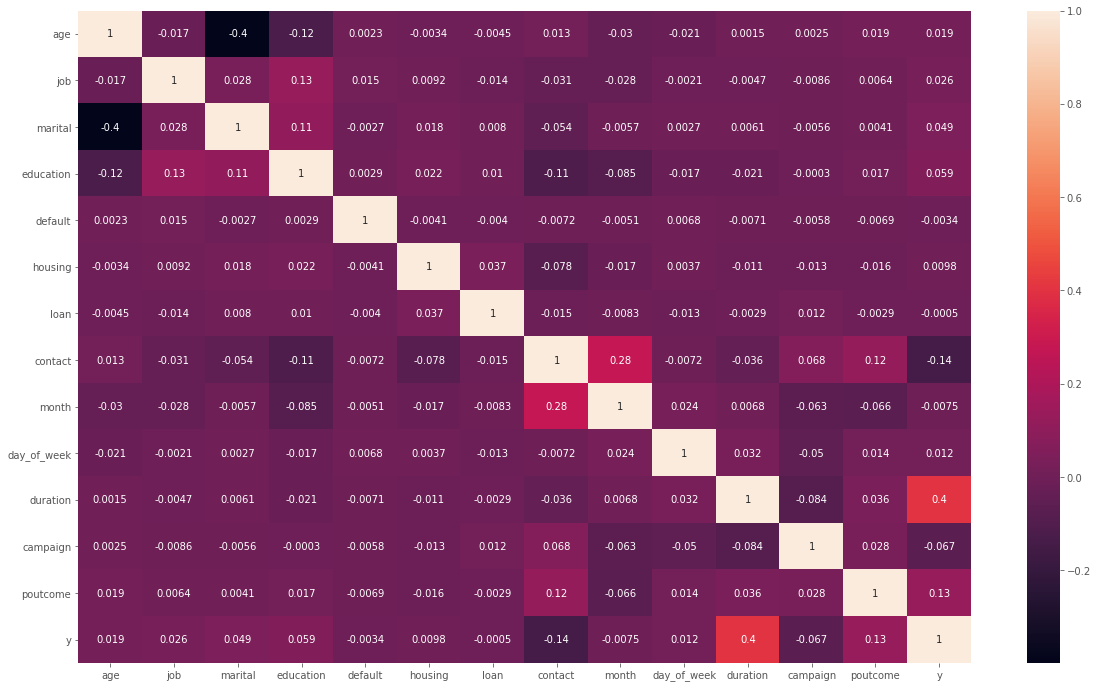

In [80]:
plt.figure(figsize=(20,12))
sns.heatmap(data.corr(),annot=True)

### Imbalance
https://machinelearningmastery.com/combine-oversampling-and-undersampling-for-imbalanced-classification/

In [81]:
smote = SMOTETomek(0.75)

x_osm, y_osm = smote.fit_sample(x,y)

y_osm.value_counts()

0    28994
1    21684
Name: y, dtype: int64

In [82]:
x_train, x_test, y_train, y_test= train_test_split(x_osm, y_osm, test_size=0.2, random_state=42)

In [84]:
#Para clasificar estaremos utilizando Regresión Logística
log_reg = LogisticRegression()
log_param={"C":10.0**np.arange(-2,3), "penalty":["l1","l2"]}

cv_log = StratifiedKFold(n_splits=5)

gridsearch_log = GridSearchCV(log_reg, log_param, cv=cv_log, scoring="f1_macro", n_jobs=-1, verbose=2)

gridsearch_log.fit(x_train,y_train)

#Mirar los resultados
print("Mejor resultado: ",gridsearch_log.best_score_)
print("Mejor parámetro: ", gridsearch_log.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejor resultado:  0.7923760731582751
Mejor parámetro:  {'C': 100.0, 'penalty': 'l2'}


[[4974  851]
 [1138 3173]]
0.8037687450670876
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      5825
           1       0.79      0.74      0.76      4311

    accuracy                           0.80     10136
   macro avg       0.80      0.79      0.80     10136
weighted avg       0.80      0.80      0.80     10136



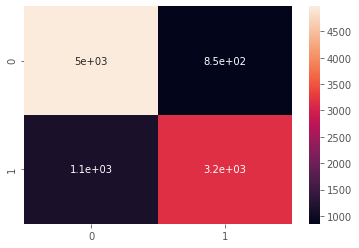

In [86]:
y_predicted = gridsearch_log.predict(x_test)

confusion = confusion_matrix(y_test, y_predicted)
print(confusion)

sns.heatmap(confusion, annot=True)
print(accuracy_score(y_test, y_predicted))
print(classification_report(y_test,y_predicted))

## Random Forrest


In [87]:
rf = RandomForestClassifier()

rf_params = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000,num=10)],
    'max_features': ['auto','sqrt','log2'],
    'max_depth': [int(x) for x in np.linspace(start=5,stop=30,num=6)],
    'min_samples_split':[5,10,15,100],
    'min_samples_leaf': [1,2,5,10],
    'criterion':['gini','entropy']
}

cv_rf = StratifiedKFold(n_splits=5)

rdm_search_rf = RandomizedSearchCV(rf, rf_params, cv=cv_rf,scoring='f1_macro',n_jobs=-1,verbose=2, n_iter=10)

rdm_search_rf.fit(x_train,y_train)

print("Mejor resultado: ", rdm_search_rf.best_score_)
print("Mejores parámetros: ", rdm_search_rf.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejor resultado:  0.8996703607605594
Mejores parámetros:  {'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20, 'criterion': 'entropy'}


[[5256  569]
 [ 343 3968]]
0.9100236779794791
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      5825
           1       0.87      0.92      0.90      4311

    accuracy                           0.91     10136
   macro avg       0.91      0.91      0.91     10136
weighted avg       0.91      0.91      0.91     10136



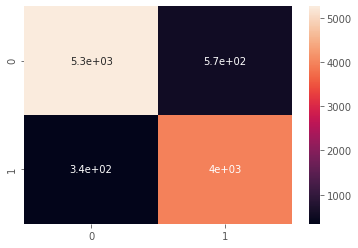

In [88]:
y_predicted_rf = rdm_search_rf.predict(x_test)

print(confusion_matrix(y_test,y_predicted_rf))
sns.heatmap(confusion_matrix(y_test,y_predicted_rf),annot=True)
print(accuracy_score(y_test,y_predicted_rf))
print(classification_report(y_test,y_predicted_rf))